## Azure の Emotion API を試す

- https://www.microsoft.com/cognitive-services/en-us/emotion-api

In [1]:
import time 
import requests
import cv2
import operator
import numpy as np
from __future__ import print_function

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter

## 池澤あやかさんの動画を拝借する

「池澤あやかがAPIを使ってQX-10を遠隔操作！」https://www.youtube.com/watch?v=jc-IBz1maTQ

```
$ youtube-dl https://www.youtube.com/watch?v=jc-IBz1maTQ
$ mkdir ikeay
$ ffmpeg -i APIQX-10-jc-IBz1maTQ.mkv "ikeay/image%05d.jpg"
```

```
$ ls ikeay | wc -l                                                                 
5477
$
```

In [2]:
# Variables

# API KEY とかの定義
from emotion_api_key import KEY1

_url = 'https://api.projectoxford.ai/emotion/v1.0/recognize'
_key = KEY1
_maxNumRetries = 10

In [3]:
def processRequest( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json()['error']['message'] ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json()['error']['message'] ) )

        break
        
    return result

def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        cv2.rectangle( img,(faceRectangle['left'],faceRectangle['top']),
                           (faceRectangle['left']+faceRectangle['width'], faceRectangle['top'] + faceRectangle['height']),
                       color = (255,0,0), thickness = 5 )


    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        currEmotion = max(currFace['scores'].items(), key=operator.itemgetter(1))[0]
        print (max(currFace['scores'].items(), key=operator.itemgetter(1)))

        textToWrite = "%s" % ( currEmotion )
        cv2.putText( img, textToWrite, (faceRectangle['left'],faceRectangle['top']-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1 )

(u'happiness', 0.99998486)


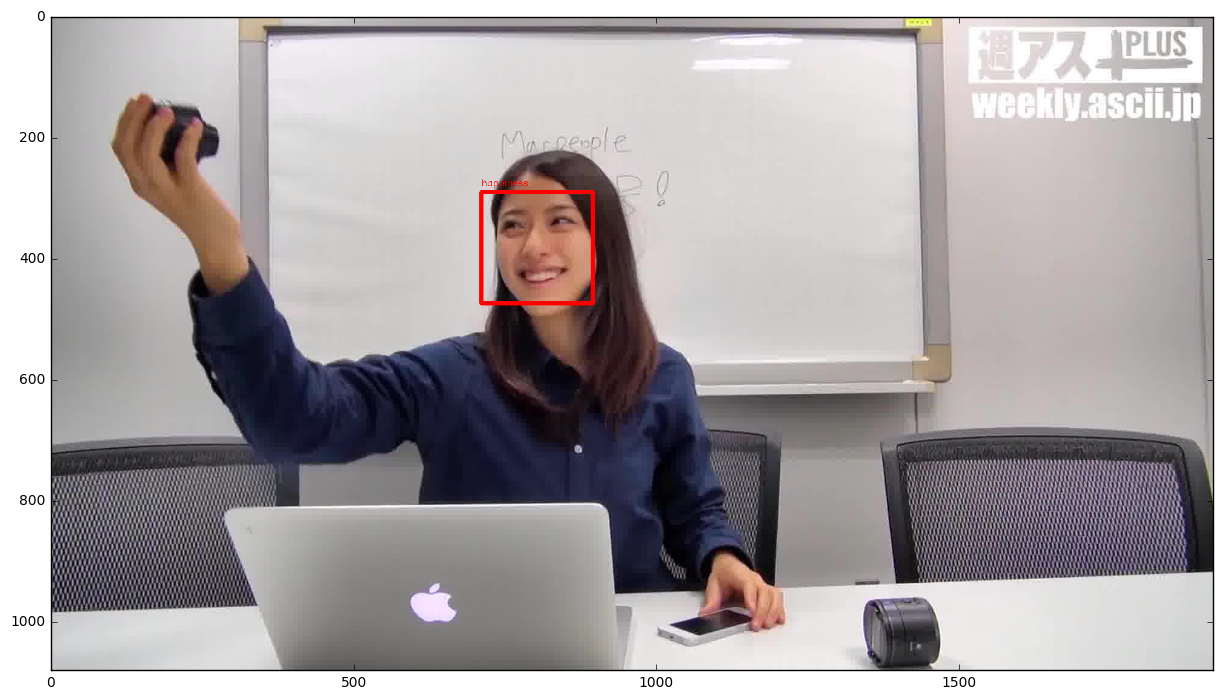

In [4]:
# Load raw image file into memory
pathToFileInDisk = r'../datasets/ikeay/image01355.jpg'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'

json = None
params = None

result = processRequest( json, data, headers, params )

if result is not None:
    # Load the original image from disk
    data8uint = np.fromstring( data, np.uint8 ) # Convert string to an unsigned int array
    img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )

最高の笑顔

(u'happiness', 0.999999046)


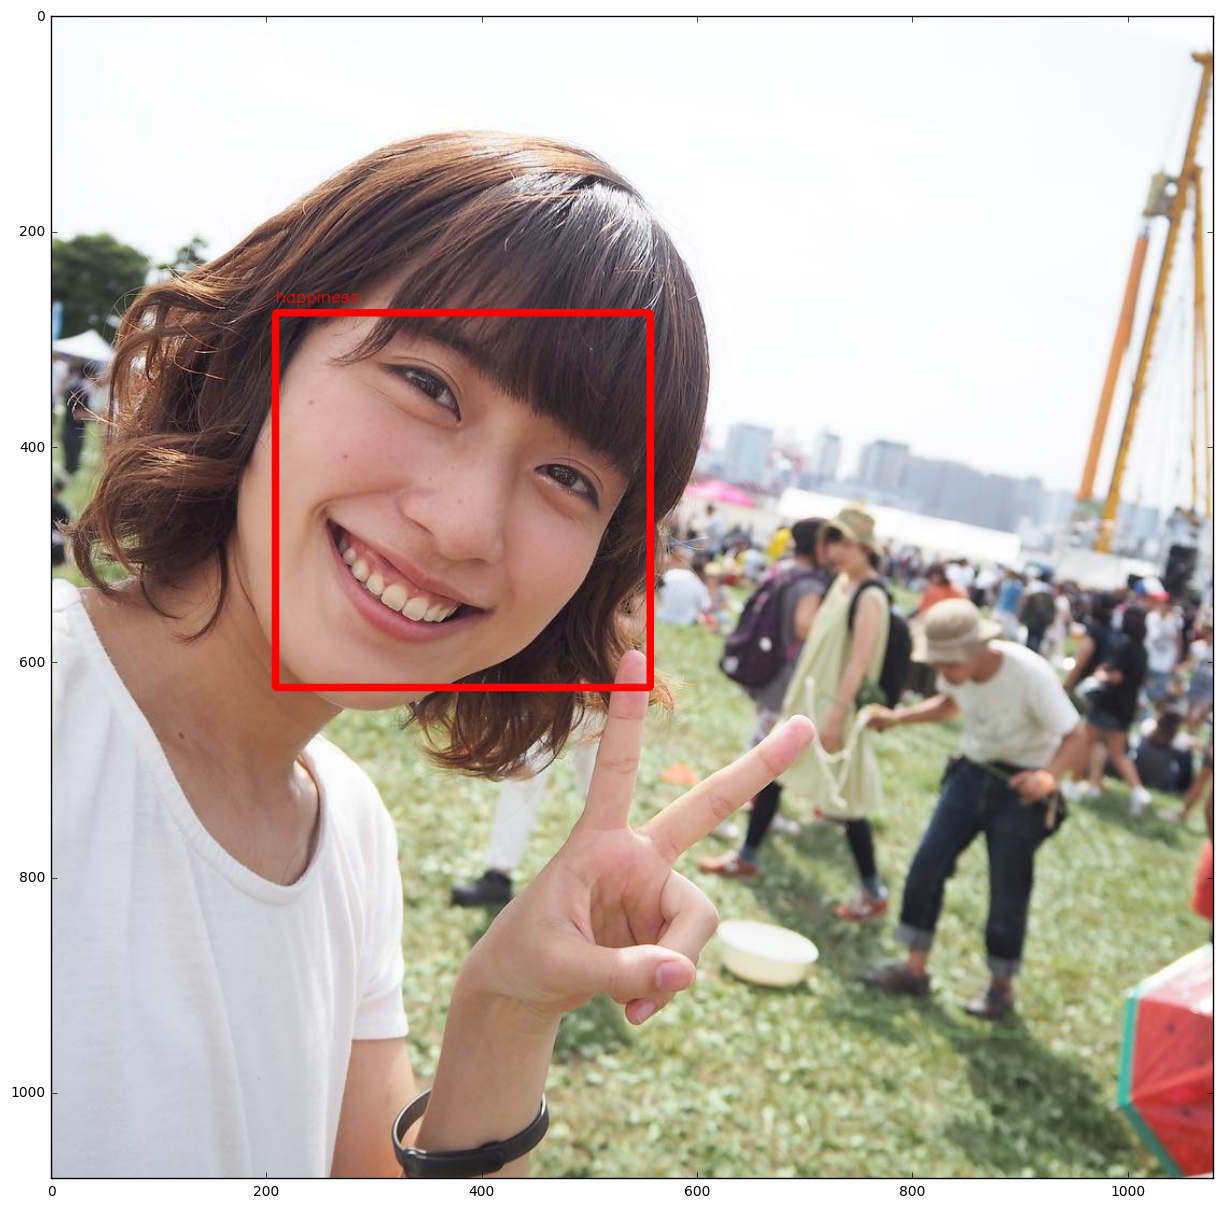

In [5]:
# URL direction to image
urlImage = 'http://weekly.ascii.jp/elem/000/000/203/203872/20140302yamag_Ayaka_2_cs1e1_x1000.jpg'
urlImage = 'http://ascii.jp/elem/000/001/098/1098518/02_1286x964.jpg'
urlImage = 'http://ascii.jp/elem/000/001/098/1098521/05_2000x750.jpg'
urlImage = 'http://ascii.jp/elem/000/001/092/1092042/06_1000x750.jpg'
urlImage = 'https://scontent-kul1-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/925863_920613848027604_263781960_n.jpg?ig_cache_key=MTE1NjI5MzE3Nzg2MTgzODMzMQ%3D%3D.2'
urlImage = 'https://scontent-kul1-1.cdninstagram.com/t51.2885-15/e35/13768260_1149697811763888_87751068_n.jpg?ig_cache_key=MTMxNDI2MTM5MjM0MTM5MTE4OQ%3D%3D.2'

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 
data = None
params = None

result = processRequest( json, data, headers, params )

if result is not None:
    # Load the original image, fetched from the URL
    arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
    img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )